In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [73]:
def plot(folder,episode,rangeX=None):
    d = pd.read_csv(os.path.join(folder,"log.%05d.csv"%(episode-1)))

    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_axes((0,0.4,1,0.6))
    ax2 = fig.add_axes((0,0.2,1,0.2),sharex=ax1)
    ax3 = fig.add_axes((0,0.0,1,0.2),sharex=ax1)
    
    x = d["step"]
    rangeMax = np.max(d["price_avg"])
    rangeMin = np.min(d["price_avg"])
    ax1.plot(x,d["price_avg"],label="avg price")
    #ax1.set_xlabel("JPY/BTC")
    
    #priceToShow = d["price"]>rangeMin
    #ax1.plot(x[priceToShow],d["price"][priceToShow],label="price")

    for iAction in [1,2]:
        goodAction = d["action"]==iAction
        if iAction==1:
            goodAction = goodAction & (d["money"] >0).shift(+1)
            goodAction[0] = (d["action"]==iAction)[0]
        if iAction==2: goodAction = goodAction & (d["volume"]>0).shift(+1)
        
        colorList  = {1:"red",2:"blue"}
        legendList = {1:"buy",2:"sell"}
        shiftList = {1:[0.99,0.01],2:[0.95,0.05]}
        ax1.scatter(d["step"][goodAction],
                    [rangeMax*shiftList[iAction][0]+rangeMin*shiftList[iAction][1]]*int(np.sum(goodAction)),
                    c=colorList[iAction],label=legendList[iAction])

    if rangeX:
        plt.xlim(rangeX)
    
    ax2.plot(x,d["volume"],"green",label="volume")
    #ax3.plot(x,d["money"] ,label="money")
    #ax3.plot(x,[d["money"][0]]*len(x) , "black")
    ax3.plot(x,d["money"]+d["price_ask"]*d["volume"] , "orange",label="money")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax1.grid()
    ax2.grid()
    ax3.grid()
    
    plt.show()


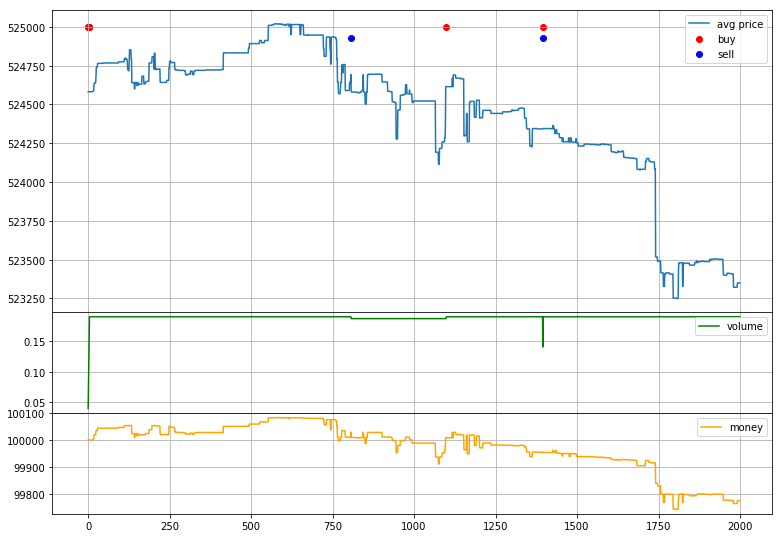

In [74]:
plot("models/v4.2_duel",episode=2205,rangeX=None)

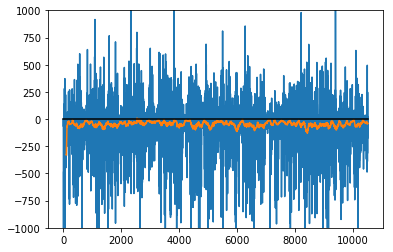

In [90]:
d = pd.read_csv("models/v4.0_duel/result.csv")
plt.plot(d["episode"],d["reward"])
plt.plot(d["episode"],d["reward"].rolling(window=100).mean())
plt.plot([min(d["episode"]),max(d["episode"])],[0,0],"black")

plt.ylim([-1000,1000])
plt.show()

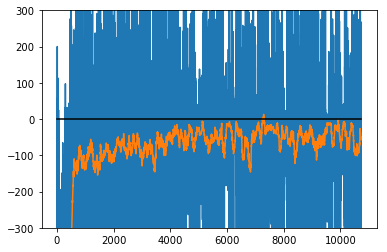

In [114]:
d = pd.read_csv("models/v4.1_duel/result.csv")
plt.plot(d["episode"],d["reward"])
plt.plot(d["episode"],d["reward"].rolling(window=100).mean())
plt.plot([min(d["episode"]),max(d["episode"])],[0,0],"black")

plt.ylim([-300,300])
plt.show()

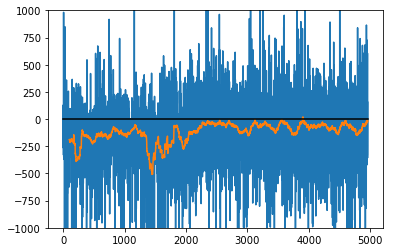

In [115]:
d = pd.read_csv("models/v4.2_duel/result.csv")
plt.plot(d["episode"],d["reward"])
plt.plot(d["episode"],d["reward"].rolling(window=100).mean())
plt.plot([min(d["episode"]),max(d["episode"])],[0,0],"black")

plt.ylim([-1000,1000])
plt.show()

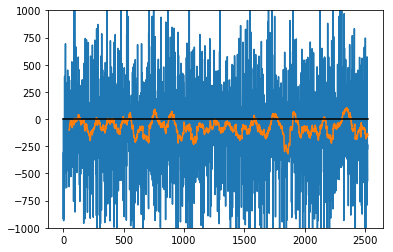

In [120]:
d = pd.read_csv("models/v4.2_duel_cont2385_moreData1/result.csv")
plt.plot(d["episode"],d["reward"])
plt.plot(d["episode"],d["reward"].rolling(window=50).mean())
plt.plot([min(d["episode"]),max(d["episode"])],[0,0],"black")

plt.ylim([-1000,1000])
plt.show()

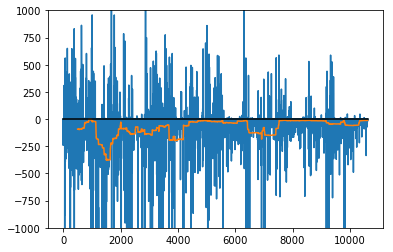

In [117]:
d = pd.read_csv("models/v4.3/result.csv")
plt.plot(d["episode"],d["reward"])
plt.plot(d["episode"],d["reward"].rolling(window=500).mean())
plt.plot([min(d["episode"]),max(d["episode"])],[0,0],"black")

plt.ylim([-1000,1000])
plt.show()